In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('./data/bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [8]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0 
)

In [9]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [10]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


In [11]:
conversion_rate_by_marital = df.groupby(
    by='marital'
)['conversion'].sum() / df.groupby(
    by='marital'
)['conversion'].count() * 100.0

In [12]:
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

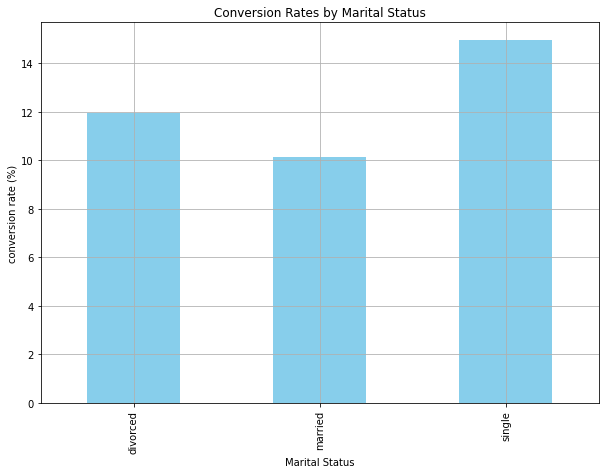

In [13]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [14]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

In [15]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

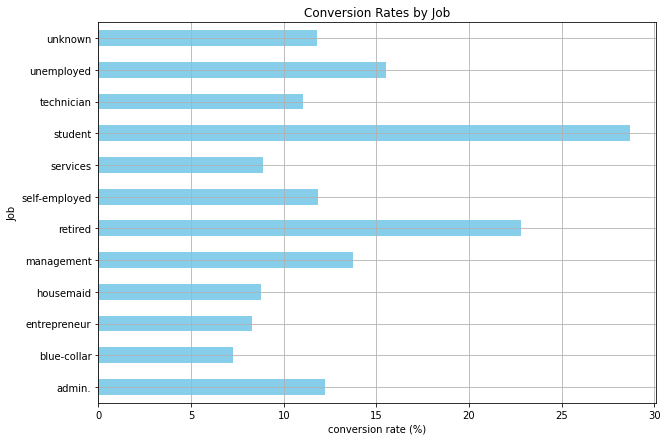

In [16]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

In [17]:
default_by_conversion_df = pd.pivot_table(
    df,
    values='y',
    index='default',
    columns='conversion',
    aggfunc=len
)

In [18]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


In [19]:
default_by_conversion_df.T

default,no,yes
conversion,,
0,39159,763
1,5237,52


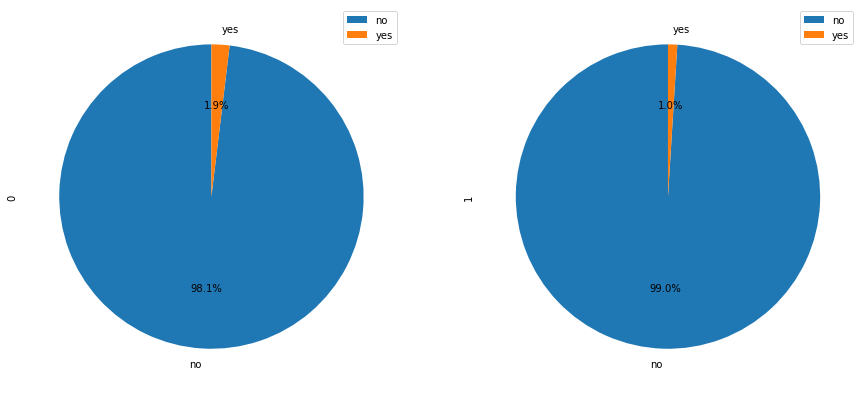

In [20]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

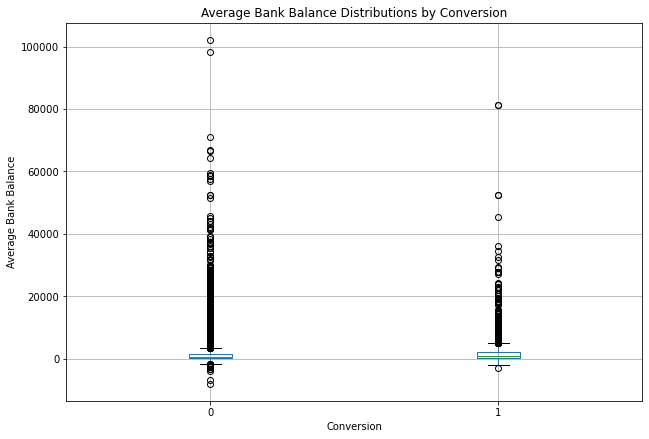

In [21]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

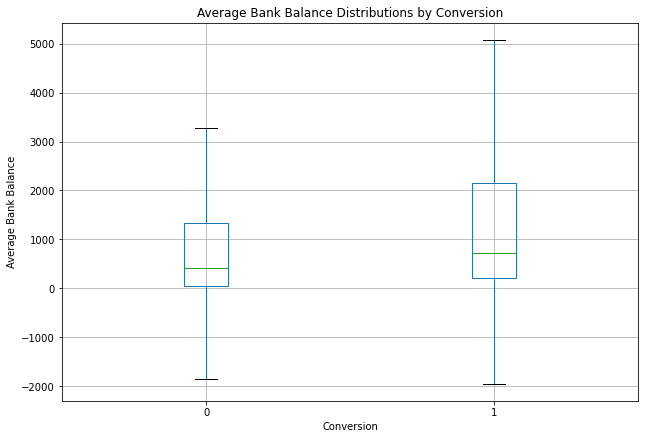

In [22]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

In [23]:
conversion_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0 

In [24]:
pd.DataFrame(conversion_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


Text(0, 0.5, 'Conversion Rate (%)')

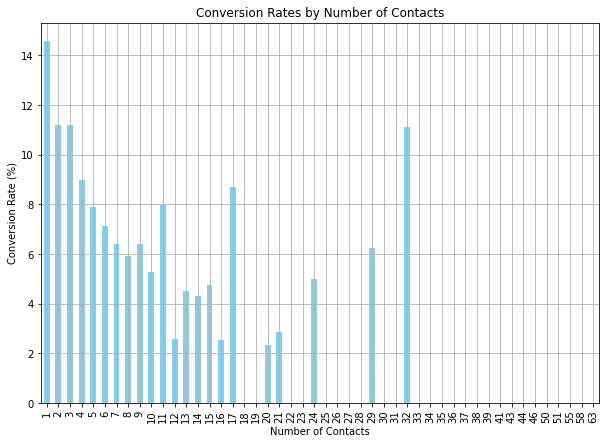

In [25]:
ax = conversion_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

In [26]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month'
]

In [27]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

In [28]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x) + 1
)

In [31]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [32]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [33]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [34]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [35]:
jobs_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [38]:
maritial_encoded_df = pd.get_dummies(df['marital'])
maritial_encoded_df.columns = ['marital_%s' % x for x in maritial_encoded_df.columns]

In [39]:
maritial_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [40]:
df = pd.concat([df, maritial_encoded_df], axis=1)

In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,0,1,0,0,0,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,1,0,0,0,0,0,0,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,0,0,0,0,0,0,1,0


In [42]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [43]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [44]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [48]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(maritial_encoded_df.columns)

response_var = 'conversion'

In [49]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [50]:
from sklearn import tree

In [51]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [52]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(max_depth=4)

In [53]:
dt_model.classes_

array([0, 1])

In [56]:
import graphviz

In [57]:
dot_data = tree.export_graphviz(
    dt_model,
    feature_names=features,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)

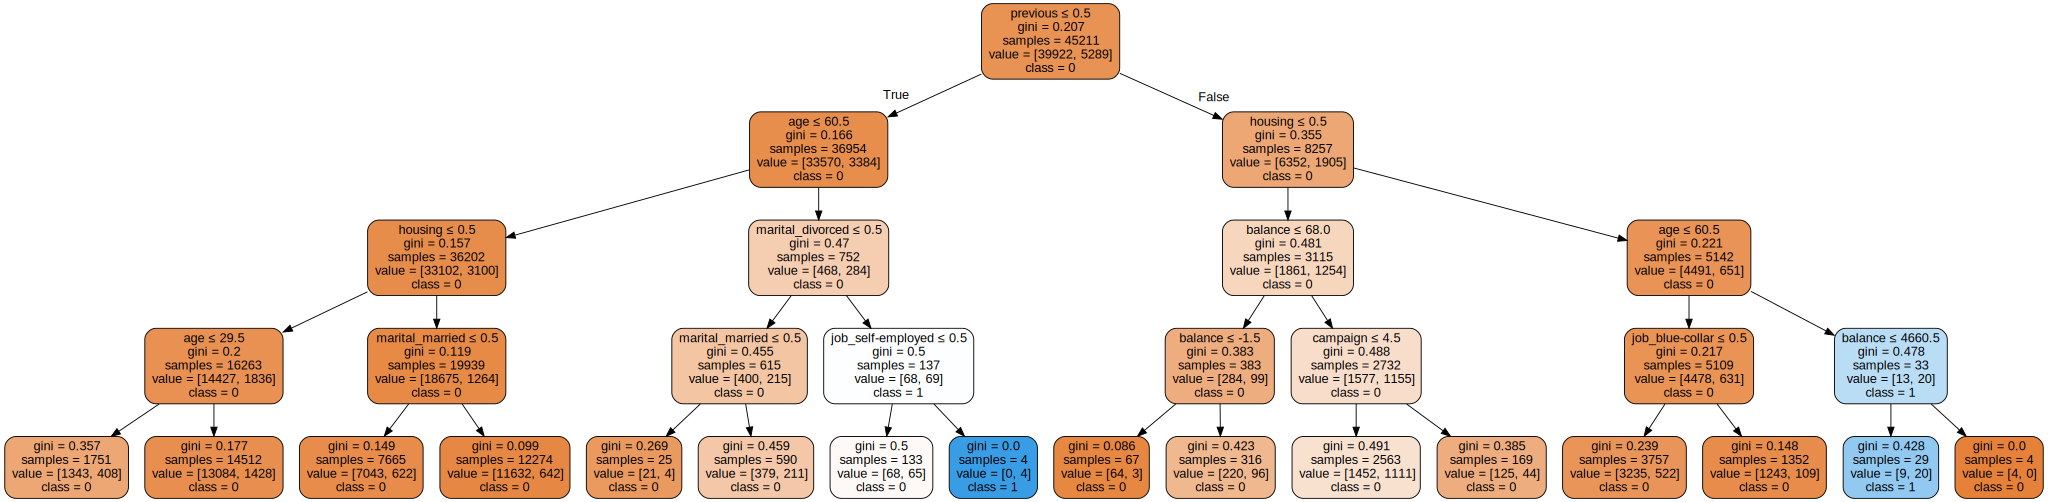

In [58]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph